In [59]:
#Import all necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Load the Credit Dataset
credits = pd.read_csv('TMDB Movie Dataset/tmdb_5000_credits.csv')
#Load the moview Dataset
movies = pd.read_csv('TMDB Movie Dataset/tmdb_5000_movies.csv')

# TF IDF

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
#Check records in the both dataset
print('Credits', credits.shape)
print('Movies', movies.shape)

Credits (4803, 4)
Movies (4803, 20)


In [7]:
#Rename & Merged
credits = credits.rename(index=str, columns={'movie_id':'id'})
movies_credit_df = movies.merge(credits, on='id')

In [8]:
movies_credit_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
movies_credit_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [64]:
movies_credit_df_cleaned = movies_credit_df.drop(columns=['homepage','title_x','title_y','production_countries'])
movies_credit_df_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
#Stats from df
movies_credit_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  vote_average         

In [12]:
#Check missing data
movies_credit_df_cleaned.isnull().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

In [13]:
movies_credit_df_cleaned.head(1)['overview']

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

In [16]:
#Make a recommendation on the movie plot summary in the overview column
tfv = TfidfVectorizer(min_df = 3, max_features=None,
                     strip_accents = 'unicode', analyzer='word', token_pattern=r'\w{1,}',
                      ngram_range=(1,3),
                      stop_words='english')

In [17]:
#Filling the NANs with empty string
movies_credit_df_cleaned['overview'] = movies_credit_df_cleaned['overview'].fillna('')

In [18]:
#Check missing data
movies_credit_df_cleaned.isnull().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

In [19]:
#Fitting the TFIDF on the overview columns
tfv_matrix = tfv.fit_transform(movies_credit_df_cleaned['overview'])

In [23]:
movies_credit_df_cleaned.shape

(4803, 19)

In [22]:
tfv_matrix.shape

(4803, 10417)

In [26]:
#Compute the similarity measures between two matrices
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [28]:
sig[0][1]

0.7615941559557649

In [30]:
#Reverse mapping of indices and movie titles
indices = pd.Series(movies_credit_df_cleaned.index, index=movies_credit_df_cleaned['original_title']).drop_duplicates()

In [31]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [32]:
indices['Newlyweds']

4799

In [33]:
sig[4799]

array([0.76159416, 0.76159416, 0.76159438, ..., 0.76159432, 0.76159416,
       0.76159478])

In [43]:
#Create recommendation function
def recommendation(title, sig=sig):
    #Get the index correspond of original title
    idx = indices[title]
    
    #get the pairwise similarity score
    sig_score = list(enumerate(sig[idx]))
    
    #sort the movie
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    
    #Take 10 most similar moview
    sig_score = sig_score[1:11]
    
    #Movie indices
    movie_indices = [i[0] for i in sig_score]
    
    #Store similarity score
    score = [i[1] for i in sig_score]
    
    #Retun the moview
    return movies_credit_df_cleaned['original_title'].iloc[movie_indices], score

In [37]:
#Test our content based recommmendation system

In [44]:
recommended_movie, score = recommendation('Avatar')
for movie, score in zip(recommended_movie, score):
    print(f"Movie Name: {movie}, Similarity Socre: {score}")

Movie Name: Obitaemyy Ostrov, Similarity Socre: 0.7616025920447053
Movie Name: The Matrix, Similarity Socre: 0.7616024401965419
Movie Name: Apollo 18, Similarity Socre: 0.7616014406892477
Movie Name: The American, Similarity Socre: 0.7616011812503369
Movie Name: Supernova, Similarity Socre: 0.7616007762729179
Movie Name: Tears of the Sun, Similarity Socre: 0.7615992890001902
Movie Name: Beowulf, Similarity Socre: 0.761598879941716
Movie Name: The Adventures of Pluto Nash, Similarity Socre: 0.7615988278895982
Movie Name: Semi-Pro, Similarity Socre: 0.7615985500328715
Movie Name: The Book of Life, Similarity Socre: 0.7615982329969357


In [45]:
recommended_movie, score = recommendation('Shanghai Calling')
for movie, score in zip(recommended_movie, score):
    print(f"Movie Name: {movie}, Similarity Socre: {score}")

Movie Name: I Am Sam, Similarity Socre: 0.7616003968173323
Movie Name: Cape Fear, Similarity Socre: 0.7615994856175351
Movie Name: Love Ranch, Similarity Socre: 0.7615992707132185
Movie Name: Big Momma's House, Similarity Socre: 0.761599257449354
Movie Name: Brothers, Similarity Socre: 0.7615989494069652
Movie Name: Nowhere to Run, Similarity Socre: 0.7615989004520236
Movie Name: Who's Your Caddy?, Similarity Socre: 0.7615985442684898
Movie Name: Puss in Boots, Similarity Socre: 0.761598511508911
Movie Name: Tracker, Similarity Socre: 0.7615984756871621
Movie Name: Tiny Furniture, Similarity Socre: 0.7615984267816296


# Weighted Avg.

In [ ]:
"""
W = Rv + Cm.v+m
W = Weighted rating,
R = Avg. for the movie as the number from 0 - 10 as mean : Rating
v = number of votes for the movie : Votes
m = minimum number votes required to be listed : Top 250
C = the mean vote across the whole report
"""

In [46]:
movies_credit_df_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [47]:
movies_credit_df_cleaned.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [65]:
#Calculate all the components based on the above formula
v = movies_credit_df_cleaned['vote_count']
R = movies_credit_df_cleaned['vote_average']
C = movies_credit_df_cleaned['vote_average'].mean()
m = movies_credit_df_cleaned['vote_average'].quantile(0.70)

In [66]:
#Apply the weighted average formula
movies_credit_df_cleaned['weighted_average'] = ((R*v) + (C *m))/(v+m)

In [67]:
movies_credit_df_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.199371
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.898799
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.299689
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.598891
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.099975


In [68]:
#Sort the df
movies_sorted_ranking = movies_credit_df_cleaned.sort_values('weighted_average', ascending=False)

In [ ]:
#EDA to understand the data weights

Text(0, 0.5, 'Movie Title')

C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 23563 (\N{CJK UNIFIED IDEOGRAPH-5C0B}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 31070 (\N{CJK UNIFIED IDEOGRAPH-795E}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 38560 (\N{CJK UNIFIED IDEOGRAPH-

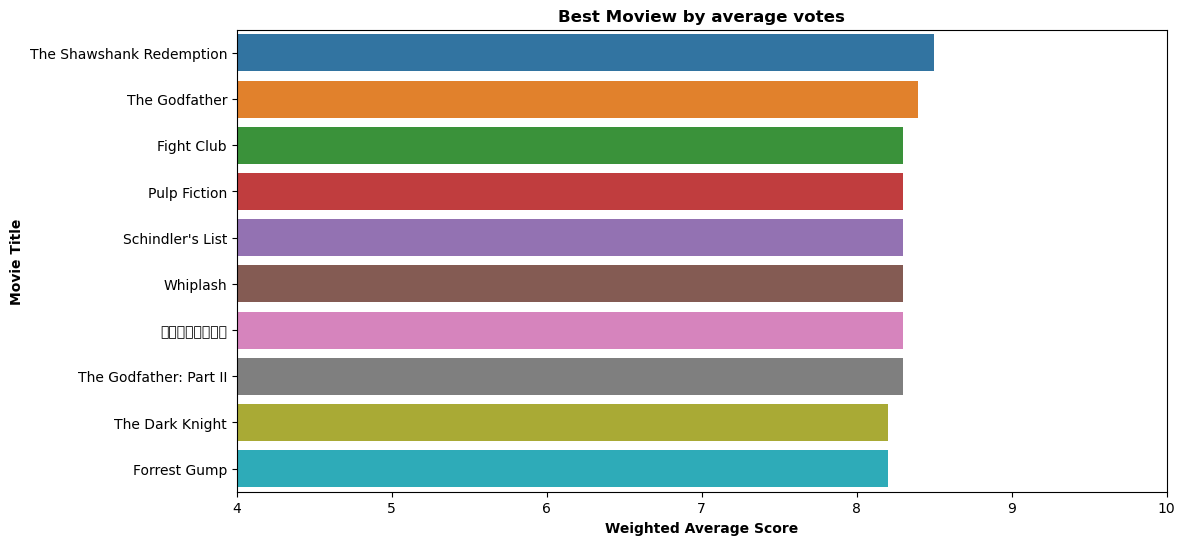

In [57]:
#Plot top 10 moview based on the weighted average score

plt.figure(figsize=(12, 6))
axis1 = sns.barplot(x=movies_sorted_ranking['weighted_average'].head(10), y=movies_sorted_ranking['original_title'].head(10), data=movies_sorted_ranking)
plt.title('Best Moview by Weighted average Score', weight='bold')
plt.xlim(4, 10)
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

Text(0, 0.5, 'Movie Title')

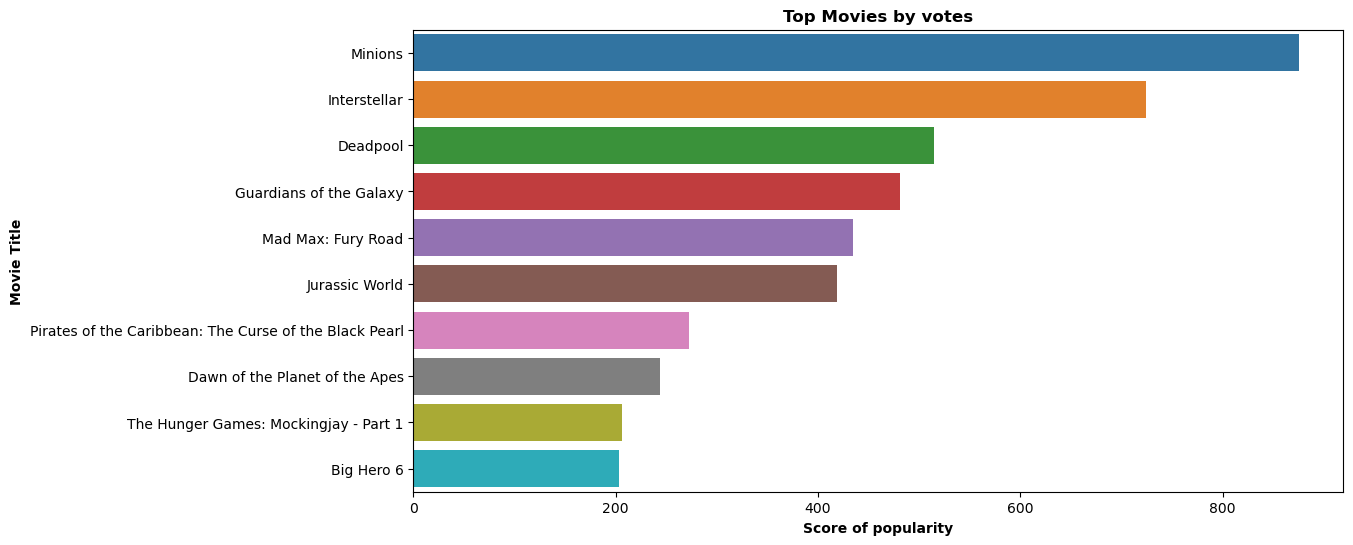

In [58]:
#Plot top 10 movies based on votes
popularity = movies_sorted_ranking.sort_values('popularity', ascending=False)
plt.figure(figsize=(12, 6))
axis1 = sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)
plt.title('Top Movies by votes', weight='bold')
plt.xlabel('Score of popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [69]:
#Min Max Scaling
scaler = MinMaxScaler()
movie_scaled_df = scaler.fit_transform(movies_credit_df_cleaned[['weighted_average', 'popularity']])
movie_normalized = pd.DataFrame(movie_scaled_df, columns=['weighted_average', 'popularity'])
movie_normalized.head()

,weighted_average,popularity
0,0.780797,0.171815
1,0.730063,0.158846
2,0.628938,0.122635
3,0.848232,0.128272
4,0.595228,0.050169


In [70]:
movies_credit_df_cleaned.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count', 'cast', 'crew',
       'weighted_average'],
      dtype='object')

In [71]:
movies_credit_df_cleaned[['normalized_weighted_average', 'normalized_popularity']] = movie_normalized

In [72]:
movies_credit_df_cleaned.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count', 'cast', 'crew',
       'weighted_average', 'normalized_weighted_average',
       'normalized_popularity'],
      dtype='object')

In [76]:
#Create a score feature with he help of  'normalized_weighted_average', 'normalized_popularity'
movies_credit_df_cleaned['score'] = movies_credit_df_cleaned['normalized_weighted_average'] * 0.5 + movies_credit_df_cleaned['normalized_popularity']
movie_score_df = movies_credit_df_cleaned.sort_values(['score'], ascending=False)
movie_score_df[['original_title','normalized_weighted_average','normalized_popularity', 'score']].head(20)

,original_title,normalized_weighted_average,normalized_popularity,score
546,Minions,0.645794,1.000000,1.322897
95,Interstellar,0.932606,0.827162,1.293465
94,Guardians of the Galaxy,0.898847,0.549462,0.998885
788,Deadpool,0.814527,0.587690,0.994953
127,Mad Max: Fury Road,0.780770,0.495989,0.886374
28,Jurassic World,0.662696,0.478206,0.809554
199,Pirates of the Caribbean: The Curse of the Bla...,0.831313,0.310620,0.726276
3865,Whiplash,0.965987,0.219887,0.702881
65,The Dark Knight,0.949496,0.213941,0.688689
82,Dawn of the Planet of the Apes,0.797473,0.278434,0.677170


Text(0, 0.5, 'Movie Title')

C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 23563 (\N{CJK UNIFIED IDEOGRAPH-5C0B}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 31070 (\N{CJK UNIFIED IDEOGRAPH-795E}) missing from current font.
  func(*args, **kwargs)
C:\Users\ramsu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 38560 (\N{CJK UNIFIED IDEOGRAPH-

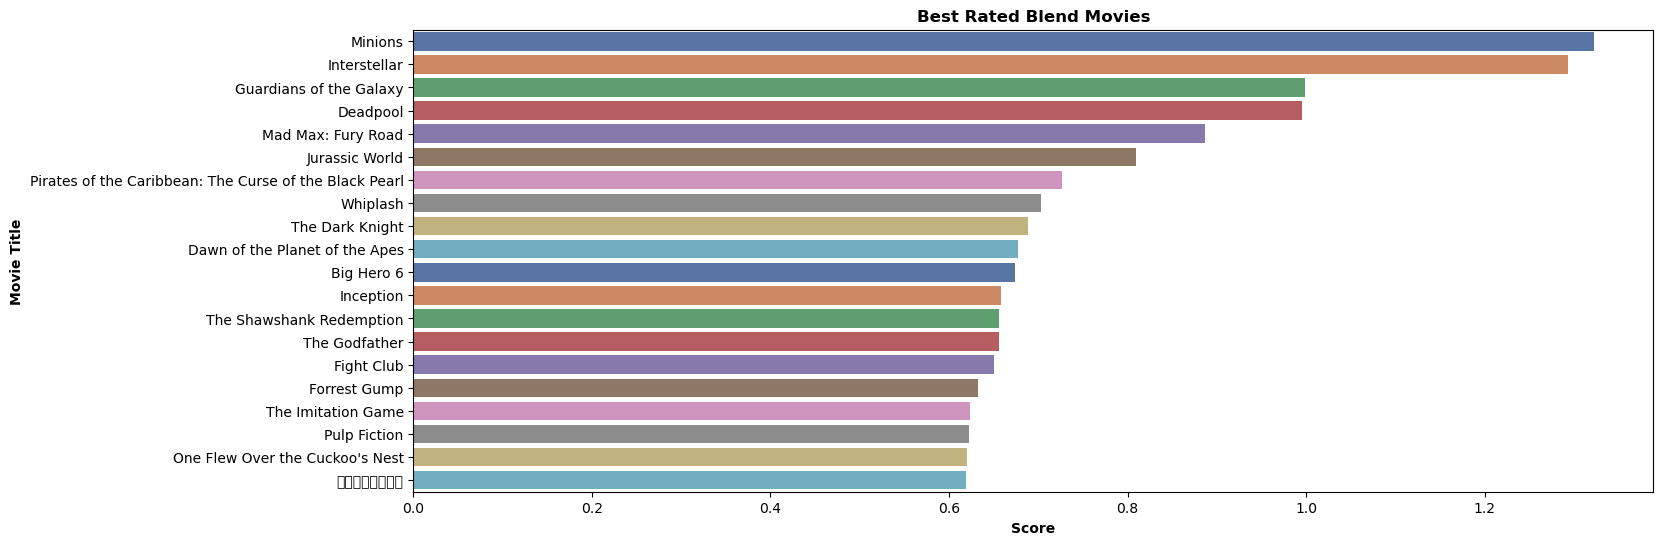

In [79]:
#Plot top 20 moviews based on score
score_df = movies_credit_df_cleaned.sort_values('score', ascending=False)
plt.figure(figsize=(16,6))
ax = sns.barplot(x = score_df['score'].head(20), y  = score_df['original_title'].head(20), data=score_df, palette='deep')
plt.title('Best Rated Blend Movies', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [84]:
movies_credit_df_cleaned1 = movies_credit_df_cleaned.copy()

In [93]:
movies_credit_df_cleaned1['overview'] = movies_credit_df_cleaned1['overview'].fillna('')

In [94]:
movies_credit_df_cleaned1['score'] = movies_credit_df_cleaned1['score'].fillna('')  # Filling NaN values in 'overview'

In [95]:
movies_credit_df_cleaned1['score'] = movies_credit_df_cleaned1['score'].astype(str)

In [96]:
#Fitting the TFIDF on the overview columns
tfv_matrix = tfv.fit_transform(movies_credit_df_cleaned1['overview']+movies_credit_df_cleaned1['score'])

In [97]:
#Compute the similarity measures between two matrices
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [98]:
sig[0][1]

0.7615942303983543

In [100]:
#Reverse mapping of indices and movie titles
indices = pd.Series(movies_credit_df_cleaned1.index, index=movies_credit_df_cleaned1['original_title']).drop_duplicates()

In [101]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [102]:
indices['Newlyweds']

4799

In [103]:
sig[4799]

array([0.76159423, 0.76159425, 0.76159443, ..., 0.76159436, 0.7615942 ,
       0.7615948 ])

In [104]:
#Create recommendation function
def recommendation(title, sig=sig):
    #Get the index correspond of original title
    idx = indices[title]
    
    #get the pairwise similarity score
    sig_score = list(enumerate(sig[idx]))
    
    #sort the movie
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    
    #Take 10 most similar moview
    sig_score = sig_score[1:11]
    
    #Movie indices
    movie_indices = [i[0] for i in sig_score]
    
    #Store similarity score
    score = [i[1] for i in sig_score]
    
    #Retun the moview
    return movies_credit_df_cleaned['original_title'].iloc[movie_indices], score

In [105]:
#Test our content based recommmendation system

In [106]:
recommended_movie, score = recommendation('Avatar')
for movie, score in zip(recommended_movie, score):
    print(f"Movie Name: {movie}, Similarity Socre: {score}")

Movie Name: Obitaemyy Ostrov, Similarity Socre: 0.7616022011138482
Movie Name: The Matrix, Similarity Socre: 0.7616019648073443
Movie Name: Apollo 18, Similarity Socre: 0.7616011930207857
Movie Name: The American, Similarity Socre: 0.7616005857523584
Movie Name: Supernova, Similarity Socre: 0.7616004061453012
Movie Name: Tears of the Sun, Similarity Socre: 0.7615991252130135
Movie Name: Beowulf, Similarity Socre: 0.7615987888496671
Movie Name: The Adventures of Pluto Nash, Similarity Socre: 0.7615986936701868
Movie Name: Semi-Pro, Similarity Socre: 0.7615984024905117
Movie Name: The Book of Life, Similarity Socre: 0.7615981327034407


In [ ]:
#Compute the similarity measures between two matrices
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

sig[0][1]

#Reverse mapping of indices and movie titles
indices = pd.Series(movies_credit_df_cleaned.index, index=movies_credit_df_cleaned['original_title']).drop_duplicates()

indices

indices['Newlyweds']

sig[4799]

#Create recommendation function
def recommendation(title, sig=sig):
    #Get the index correspond of original title
    idx = indices[title]
    
    #get the pairwise similarity score
    sig_score = list(enumerate(sig[idx]))
    
    #sort the movie
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    
    #Take 10 most similar moview
    sig_score = sig_score[1:11]
    
    #Movie indices
    movie_indices = [i[0] for i in sig_score]
    
    #Store similarity score
    score = [i[1] for i in sig_score]
    
    #Retun the moview
    return movies_credit_df_cleaned['original_title'].iloc[movie_indices], score

#Test our content based recommmendation system

recommended_movie, score = recommendation('Avatar')
for movie, score in zip(recommended_movie, score):
    print(f"Movie Name: {movie}, Similarity Socre: {score}")